In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from datetime import datetime


## Data Description

In [2]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_cus = pd.read_csv('Customer_ID.csv')
df_tran = pd.read_csv('Transaction_ID.csv')

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [5]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [7]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
df_cus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df_tran.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
df_cab['Transaction ID'].nunique()

359392

## Data Transformation


In [12]:
# transform population and user number into int
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Population'] = df_city['Population'].astype(np.int64)

# Attribute 'Users' should be an integer
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Users'] = df_city['Users'].astype(np.int64)

In [13]:
df_city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [14]:
df = df_cab.merge(df_tran, how= 'left', on= 'Transaction ID')
df = df.merge(df_cus, how= 'left', on ='Customer ID')
df = df.merge(df_city, how= 'left', on = 'City')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 41.1+ MB


In [15]:
df[df.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users


In [16]:
# Create Year and Season columns in the data
df['year'] = df['Date of Travel'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').year)
df['month'] = df['Date of Travel'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').month)

In [17]:
# Create Profit Column
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

## Data Exploration

''

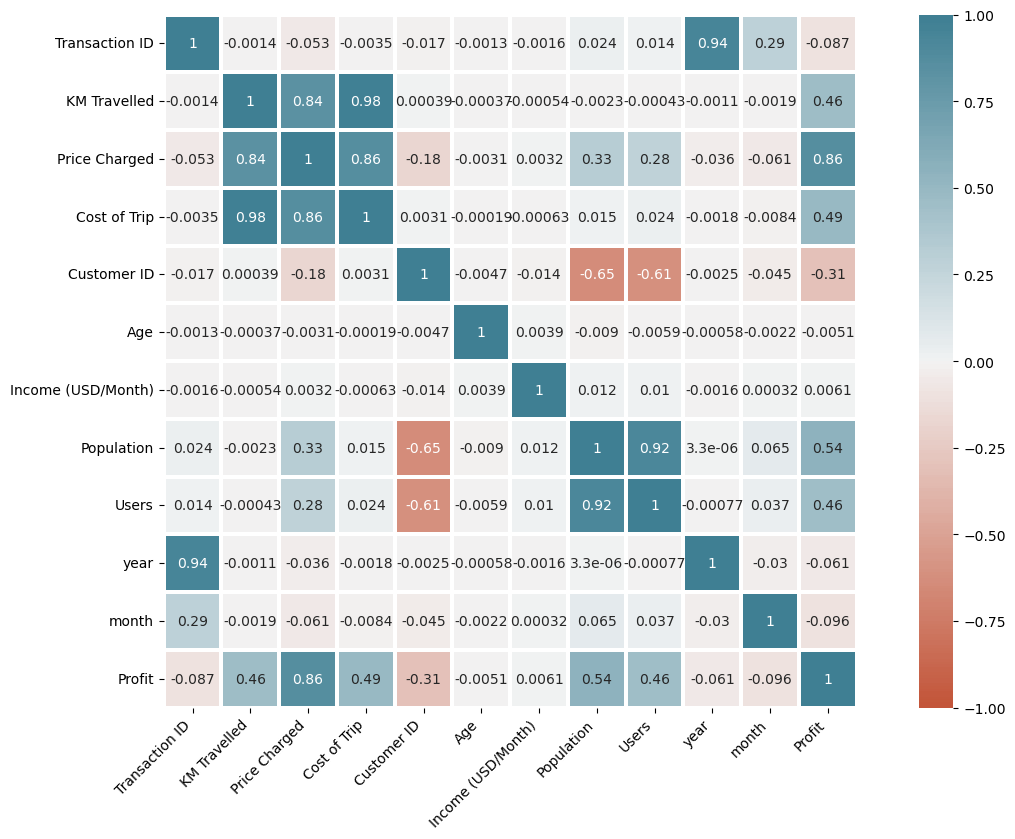

In [18]:
corr =df.corr()

plt.figure(figsize = (16, 9))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot = True,
    annot_kws={'fontsize' : 10},
    linewidths = 1.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
;

 **As Expected, we can see strong positive correlation between KM travelled and price charged and the cost of trip, as well as positive correlation between population and users**
 
 

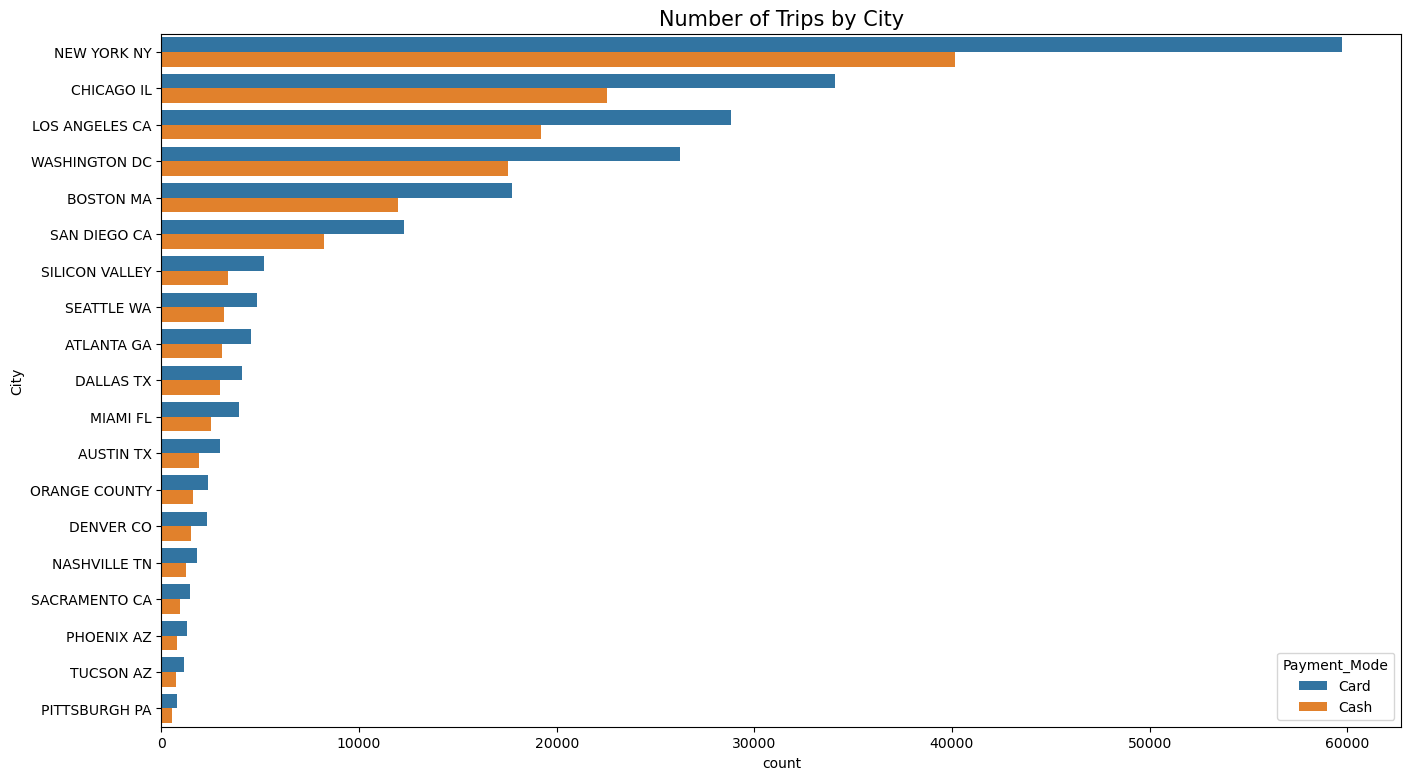

In [19]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(y='City', data=df, hue='Payment_Mode', order=df['City'].value_counts(ascending = False).index)
plt.title('Number of Trips by City', fontsize=15);

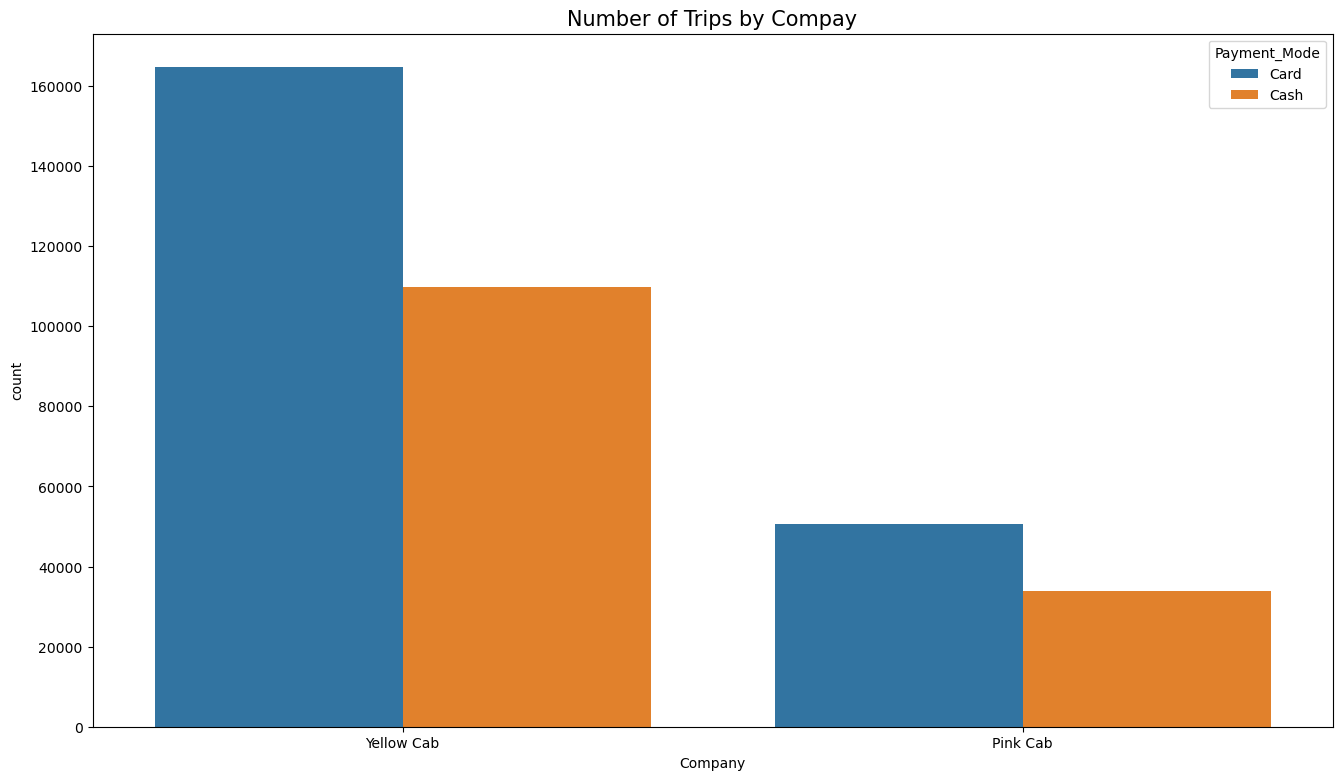

In [20]:
plt.figure(figsize = (16, 9))

ax = sns.countplot(x='Company', data=df, hue='Payment_Mode', order=df['Company'].value_counts(ascending = False).index)
plt.title('Number of Trips by Compay', fontsize=15);

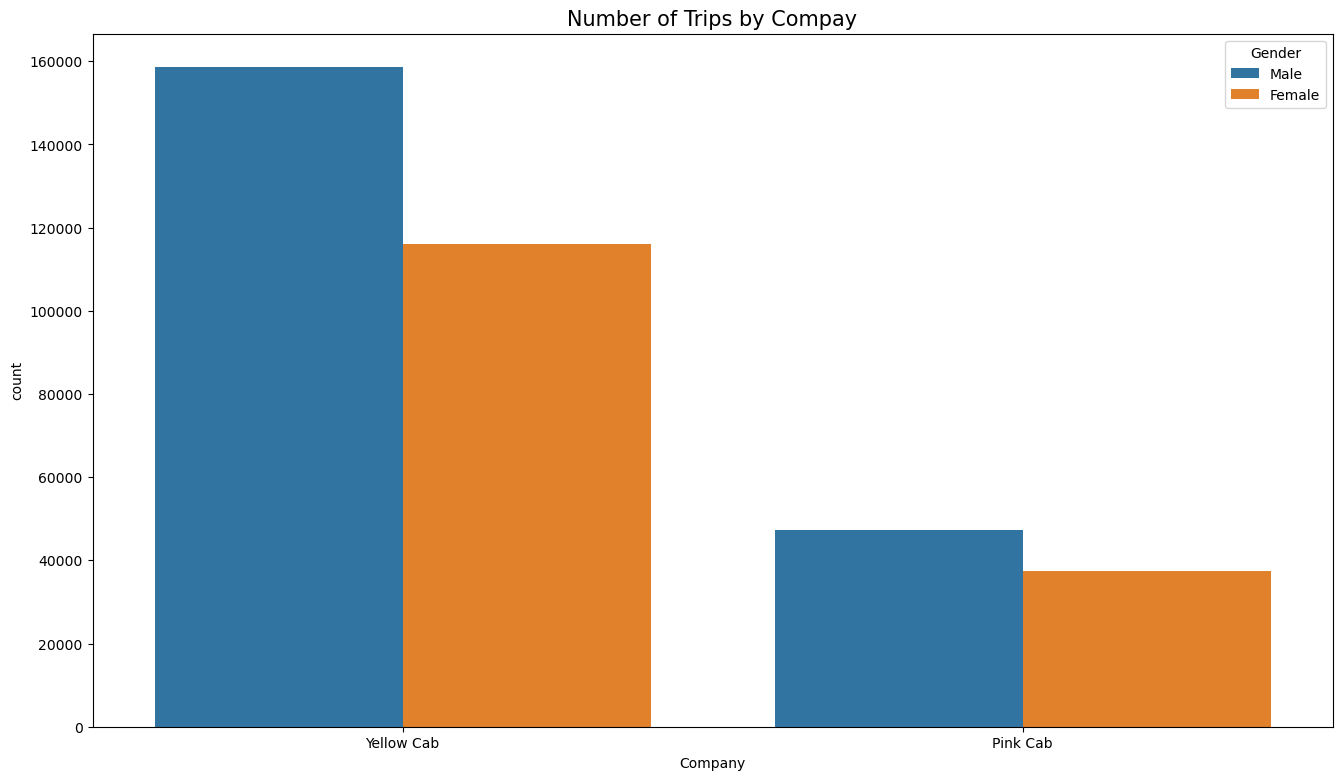

In [21]:
plt.figure(figsize = (16, 9))

ax = sns.countplot(x='Company', data=df, hue='Gender', order=df['Company'].value_counts(ascending = False).index)
plt.title('Number of Trips by Compay', fontsize=15);

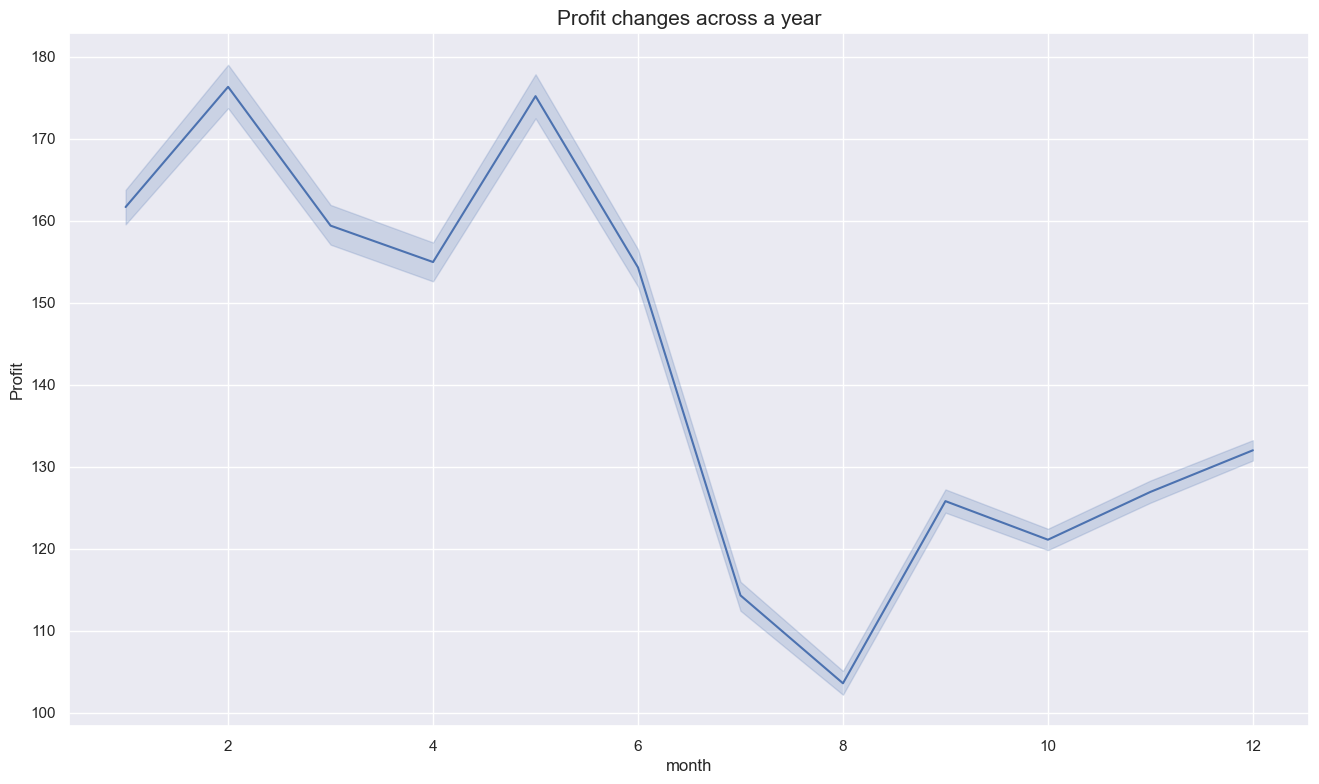

In [22]:
plt.figure(figsize = (16, 9))
sns.set(style = 'darkgrid')

ax=sns.lineplot(x='month', y='Profit', data=df)
plt.title('Profit changes across a year', fontsize=15);

We can see that there is drop of profits in the middle of the year especially month 6-8, it might be realted to some seasonality difference in summer.

In [39]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,1,57.315
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,1,23.666
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1,27.568
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,1,25.798
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,1,16.844


## Hypothesis Testing

### Hypothesis 1: Yellow Cab Company produces higher margin profits than Pink Cab Company
H0: Yellow Cab Company  has no difference margin profits than Pink Cab Company. <br> H1: Yellow Cab Company has higher margin profits than Pink Cab Company

In [23]:
company = df.groupby('Company')
profits = company['Profit'].sum()
revenue = company['Price Charged'].sum()

In [24]:
profits

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [25]:
revenue

Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price Charged, dtype: float64

In [27]:
yellow_margin = df.loc[(df.Company == 'Yellow Cab'),'Profit']/df.loc[(df.Company == 'Yellow Cab'),'Price Charged']
pink_margin = df.loc[(df.Company == 'Pink Cab'),'Profit']/df.loc[(df.Company == 'Pink Cab'),'Price Charged']

In [28]:
yellow_margin

233       0.653912
234       0.634376
235       0.637189
236       0.601623
237       0.612868
            ...   
359387    0.084922
359388    0.060677
359389    0.200014
359390    0.219865
359391    0.072872
Length: 274681, dtype: float64

In [29]:
t_stat, p_value = stats.ttest_ind(yellow_margin, pink_margin, alternative = 'greater')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  182.9010295949678
P-Value:  0.0


> Since we have a very significant p value (p < .0), we can reject the null hypothesis and conclude that yellow cab company has significantly higher margin proft than pink cab company.

### Hypothesis 2: There is significant difference in profit between male and female users
H0: There is no difference of profits between male and female users. <br> H1: There is significant difference of profits between male and female users

In [32]:
male_profit = df.loc[(df.Gender=='Male'), 'Profit']
female_profit = df.loc[(df.Gender=='Female'), 'Profit']

In [69]:
t_stat, p_value = stats.ttest_ind(male_profit, female_profit, equal_var=True, alternative = 'two-sided')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  12.70131593950125
P-Value:  5.921884821326977e-37


> The p value is less than 0.05, so we reject the null hypothesis and conclude that there is significant difference of profits between male and female users

### Hypothesis 3: There is significant difference in profit between card and cash payments
H0: There is no difference of profits between card and cash payment. <br> H1: There is significant difference of profits between card and cash payment

In [40]:
card_profit = df.loc[(df.Payment_Mode=='Card'), 'Profit']
cash_profit = df.loc[(df.Payment_Mode=='Cash'), 'Profit']

In [41]:
t_stat, p_value = stats.ttest_ind(card_profit, cash_profit, equal_var=True, alternative = 'two-sided')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -0.7630743349932244
P-Value:  0.4454195660215633


 > Our p value is larger than 0.05, so we can not reject the null hypothesis that there is no difference of profits between card and cash payment.

### Hypothesis 4: There is some difference in profit between seasons
H0: all profits from four seasons are the same. <br> H1: at least one season has different protfits from other seasons

In [53]:
spring_profit = df.loc[(df.month>=3)&(df.month<=5), 'Profit']
summer_profit = df.loc[(df.month>=6)&(df.month<=8), 'Profit']
fall_profit = df.loc[(df.month>=9)&(df.month<=11), 'Profit']
winter_profit = df.loc[(df.month==12)|(df.month<=2), 'Profit']

In [58]:
spring_profit.values

array([105.585 ,  32.65  , 132.68  , ...,  49.3068, 131.76  ,  15.08  ])

In [60]:
fvalue, pvalue = stats.f_oneway(spring_profit, summer_profit, fall_profit, winter_profit)
print("F-statistic value: ", fvalue)  
print("P-Value: ", pvalue)

F-statistic value:  1269.6403268417762
P-Value:  0.0


We see there is significant difference by runing f test, than we separatelly test if summer has the significant lower profits from other seasons

In [61]:
t_stat, p_value = stats.ttest_ind(summer_profit, spring_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -46.820245657612034
P-Value:  0.0


In [62]:
t_stat, p_value = stats.ttest_ind(summer_profit, winter_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -34.91309834956815
P-Value:  2.0203546837999336e-266


In [63]:
t_stat, p_value = stats.ttest_ind(summer_profit, fall_profit, equal_var=True, alternative = 'less')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -3.7490754352857634
P-Value:  8.876831073342808e-05


> As result, we only find significant difference between summer and spring season's profits ( p < 0.01), so we can conlude that summer season has lower profits compared to spring season, but no significant difference compared to fall and winter season

### Hypothesis 5: There is significant correaltion between number of customers and profits
H0: There is no significant correaltion between number of customers and profits. <br> H1: There is  significant correaltion between number of customers and profits.

In [64]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,1,57.315
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,1,23.666
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,1,27.568
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,1,25.798
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,1,16.844


In [67]:
pearson_r, p_value = stats.pearsonr(df['Users'], df['Profit'])
print("Correlation Coeffcient: ", pearson_r)  
print("P-Value: ", p_value)

Correlation Coeffcient:  0.4577576722574396
P-Value:  0.0


> We find there is a significant (p < 0.01) medium positive correlation between user size and profits with a pearson r value of 0.46

## Recommendation:

1. Yellow Cab is more profitable than Pink Cab, considering investing more on Yello Cab could be recommended.
2. Male customers produce higher profits than female customers which could be implemented when considering target customers in advertising.
3. Summer season shows less profits than other seasons, so investment should be put more onto other seasons to earn larger profits.
4. Cities that have larger pop of users are more likely to have higher profits earned, so it will be important to increase total user size or invest more in larger user-based cities.